# State of the Union (1978 - 2019)

The State of the Union Address (sometimes abbreviated to SOTU) is an annual message delivered by the President of the United States to a joint session of the United States Congress at the beginning of each calendar year in office. The message typically includes a budget message and an economic report of the nation, and also allows the President to propose a legislative agenda and national priorities.

In this project we have collected State of the Union Addresses from last fourty years delivered by seven of the United States Presidents including Jimmy Carter, Ronald Regan, George Bush, Bill Clinton, George W Bush, Barrack Obama and the present U.S President Donald Trump. 

The corpus includes on average two addresses delivered by each of the preseidents

  - President Jimmy Carter State of the Union 1978, 1980
  - President Ronald Regan State of the Union 1987, 1988
  - President George Bush State of the Union 1991, 1992
  - President Bill Clinton State of the Union 1999, 2000
  - President George W Bush State of the Union 2005, 2006
  - President Barrack Obama State of the Union 2015, 2016
  - President Donald trump State of the Union 2018, 2019
    
All addresses have been divided in to two corpuses Democratic and Republican. The following approaches have been used to distinguish and analyze speeches delivered by Presidents from both the Democratic and Republican Parties.

   - Bag of Words Approach: To compare most common words used for both the corpuses
   - Principle Component Analysis: To identify words which explain maximum variance in the data
   - K-Means Clustering : To identify how many possible clusters exist in the data
   - Tf-idf approach for words and sentences

    

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
import numpy

from collections import Counter
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Corpus state_union from nltk

In [2]:
# Importing the state_union corpus from nltk
from nltk.corpus import state_union
nltk.download('state_union')
Address = nltk.corpus.state_union.fileids()

[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Instructor\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!


### Corpus Exploration 

In [3]:
# length of corpus inaugural
print('Length of Corpus state_union:',len(Address),'Texts')

Length of Corpus state_union: 65 Texts


In [4]:
# Most recent presidential speeches
Address[34:]

['1978-Carter.txt',
 '1979-Carter.txt',
 '1980-Carter.txt',
 '1981-Reagan.txt',
 '1982-Reagan.txt',
 '1983-Reagan.txt',
 '1984-Reagan.txt',
 '1985-Reagan.txt',
 '1986-Reagan.txt',
 '1987-Reagan.txt',
 '1988-Reagan.txt',
 '1989-Bush.txt',
 '1990-Bush.txt',
 '1991-Bush-1.txt',
 '1991-Bush-2.txt',
 '1992-Bush.txt',
 '1993-Clinton.txt',
 '1994-Clinton.txt',
 '1995-Clinton.txt',
 '1996-Clinton.txt',
 '1997-Clinton.txt',
 '1998-Clinton.txt',
 '1999-Clinton.txt',
 '2000-Clinton.txt',
 '2001-GWBush-1.txt',
 '2001-GWBush-2.txt',
 '2002-GWBush.txt',
 '2003-GWBush.txt',
 '2004-GWBush.txt',
 '2005-GWBush.txt',
 '2006-GWBush.txt']

In [5]:
### President Jimmy Carter State of the Union 1978, 1980
Carter_1978 = nltk.corpus.state_union.raw('1978-Carter.txt')
Carter_1979 = nltk.corpus.state_union.raw('1979-Carter.txt')
Carter_1980 = nltk.corpus.state_union.raw('1980-Carter.txt')
Carter_raw = Carter_1978 + Carter_1979 #+ Carter_1980

In [6]:
### President Ronald Regan State of the Union 1987, 1988
Reagan_1987 = nltk.corpus.state_union.raw('1987-Reagan.txt')
Reagan_1988 = nltk.corpus.state_union.raw('1988-Reagan.txt')
Reagan_raw = Reagan_1987 + Reagan_1988 

In [7]:
### President Bush State of the Union 1991, 1992
Bush_1991 = nltk.corpus.state_union.raw('1991-Bush-2.txt')
Bush_1992 = nltk.corpus.state_union.raw('1992-Bush.txt')
Bush_raw = Bush_1991 + Bush_1992

In [8]:
### President Bill Clinton State of the Union 1999, 2000
Clinton_1999 = nltk.corpus.state_union.raw('1999-Clinton.txt')
Clinton_2000 = nltk.corpus.state_union.raw('2000-Clinton.txt')
Clinton_raw = Clinton_1999 + Clinton_2000 

In [9]:
### President GW Bush State of the Union 2005, 2006
GWBush_2005 = nltk.corpus.state_union.raw('2005-GWBush.txt')
GWBush_2006 = nltk.corpus.state_union.raw('2006-GWBush.txt')
GWBush_raw = GWBush_2005 + GWBush_2006

In [10]:
### President Barrack Obama State of the Union 2015, 2016
Obama2015 = open('C:/Users/Instructor/Dropbox/Data Science/Datasets/Obama_state_union_2015.txt',)
Obama2015_raw = Obama2015.read()

Obama2016 = open('C:/Users/Instructor/Dropbox/Data Science/Datasets/Obama_state_union_2016.txt',)
Obama2016_raw = Obama2016.read()
Obama_raw = Obama2015_raw + Obama2016_raw

In [11]:
### President Donald trump State of the Union 2018, 2019
Trump2018 = open('C:/Users/Instructor/Dropbox/Data Science/Datasets/trump_state_union_2018.txt',)
Trump2018_raw = Trump2018.read()

Trump2019 = open('C:/Users/Instructor/Dropbox/Data Science/Datasets/trump_state_union_2019.txt',)
Trump2019_raw = Trump2019.read()
Trump_raw = Trump2018_raw + Trump2019_raw

In [102]:
Republican_raw = Reagan_raw + Bush_raw + GWBush_raw + Trump_raw
Democratic_raw = Carter_raw + Clinton_raw + Obama_raw

### Number of Words in each of the texts

In [13]:
print('\nDemocraic word length:', len(Democratic_raw))
print('Republican word length:', len(Republican_raw))


Democraic word length: 213320
Republican word length: 221334


### Text samples from each set

In [14]:
print('Democratic:\n', Democratic_raw[0:200])
print('\nRepublican:\n', Republican_raw[0:200])

Democratic:
 PRESIDENT JIMMY CARTER'S ADDRESS TO A JOINT SESSION OF CONGRESS ON THE STATE OF THE UNION
 
Two years ago today we had the first caucus in Iowa, and one year ago tomorrow, I walked from here to the Wh

Republican:
 PRESIDENT RONALD REAGAN'S ADDRESS BEFORE A JOINT SESSION OF CONGRESS ON THE STATE OF THE UNION
 
January 27, 1987

Thank you very much. Mr. Speaker, Mr. President, distinguished members of Congress, h


### Creating Function to clean Text's

In [15]:
import re
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    # Search for all non-letters and replace them with a space
    # Convert all upper charecters to lower
    text = re.sub(r'--',' ',str(text))
    text = re.sub("[^a-zA-Z]", " ", str(text))
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub(text,lambda x: x.group(0).lower(), text) 
    text = ' '.join(text.split())
    return text

In [16]:
Democratic = text_cleaner(Democratic_raw)
Republican = text_cleaner(Republican_raw)

### Parsing Speeches through Spacy

In [17]:
# Parse the cleaned speeches. 
nlp = spacy.load('en')
Democratic_doc = nlp(Democratic)
Republican_doc = nlp(Republican)

In [18]:
# Let's explore the objects we've built.
print("The doc object is a {} object.\n".format(type(Democratic_doc)))
print("Democratic is {} tokens long".format(len(Democratic_doc)))
print("Republican is {} tokens long".format(len(Republican_doc)))

The doc object is a <class 'spacy.tokens.doc.Doc'> object.

Democratic is 37450 tokens long
Republican is 38082 tokens long


### First few tokens for each Speech

In [19]:
print("Democratic:'{}'".format(Democratic_doc[:10]))
print("Republican:'{}'" .format(Republican_doc[:10]))

Democratic:'president jimmy carter s address to a joint session of'
Republican:'president ronald reagan s address before a joint session of'


[Inaugural Speeches](https://towardsdatascience.com/intro-to-nlp-using-inaugural-speeches-of-presidents-8c7ca32cbdfe)

### Grouping in to Sentences

In [20]:
Democratic_sents = [[sent, "Democratic"] for sent in Democratic_doc.sents]
Republican_sents = [[sent, "Republican"] for sent in Republican_doc.sents]

In [21]:
# Combine the sentences from all speeches into one data frame.
# sentences = sentences.rename(columns = {0:"Sentence", 1:'President'})
sentences_df = pd.DataFrame(Democratic_sents + Republican_sents)
sentences_df.head()

,0,1
0,"(president, jimmy, carter, s, address, to, a, ...",Democratic
1,"(two, years, ago, today, we, had, the, first, ...",Democratic
2,"(t, know, it, then, when, i, walked)",Democratic
3,"(but, i, ve, been, trying, to, save, energy, e...",Democratic
4,"(the, state, of, our, union, is, sound, we, ar...",Democratic


In [22]:
sentences_df[1].value_counts()

Democratic    756
Republican    666
Name: 1, dtype: int64

## BAG OF WORDS APPROACH

Let's create a  Function to select 2000 most common words

In [23]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(500)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences_df, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences_df[0]
    df['text_source'] = sentences_df[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 100 == 0:
            print("Processing row {}".format(i))
            
    return df

### Setting up the (BOW)

In [24]:
# Setting up the bags.
Democratic_words = bag_of_words(Democratic_doc)
Republican_words = bag_of_words(Republican_doc)

### Length of words in the (BOW)

In [25]:
print("Democratic (BOW) Length:'{}'".format(len(Democratic_words)))
print("Republican (BOW) Length:'{}'".format(len(Republican_words)))

Democratic (BOW) Length:'500'
Republican (BOW) Length:'500'


### Combining (BOW's) to create a set of unique words

In [26]:
# Combining bags to create a set of unique words.
unique_words = set(Democratic_words + Republican_words)

In [137]:
unique_words

{'able',
 'abroad',
 'access',
 'account',
 'achieve',
 'act',
 'action',
 'add',
 'address',
 'administration',
 'advance',
 'affordable',
 'afghanistan',
 'africa',
 'age',
 'agenda',
 'agent',
 'aggression',
 'ago',
 'agree',
 'agreement',
 'ahead',
 'aid',
 'al',
 'allow',
 'ally',
 'amendment',
 'america',
 'american',
 'answer',
 'applause',
 'approach',
 'area',
 'arm',
 'asia',
 'aside',
 'ask',
 'assistance',
 'attack',
 'authority',
 'away',
 'baby',
 'bad',
 'balance',
 'balanced',
 'barrier',
 'base',
 'basic',
 'bear',
 'because',
 'begin',
 'believe',
 'benefit',
 'better',
 'big',
 'bill',
 'billion',
 'bipartisan',
 'bless',
 'border',
 'brave',
 'break',
 'bring',
 'budget',
 'build',
 'burden',
 'bush',
 'business',
 'buy',
 'call',
 'camp',
 'campaign',
 'capital',
 'capitol',
 'car',
 'care',
 'century',
 'certain',
 'challenge',
 'chamber',
 'chance',
 'change',
 'child',
 'china',
 'choice',
 'choose',
 'citizen',
 'city',
 'class',
 'classroom',
 'clean',
 'clear

In [28]:
len(unique_words)

643

In [29]:
sentences_df.shape

(1422, 2)

### Creating a DataFrame with (BOW) Features

In [30]:
BOW_df = bow_features(sentences_df, unique_words)
BOW_df.head()

Processing row 0
Processing row 100
Processing row 200
Processing row 300
Processing row 400
Processing row 500
Processing row 600
Processing row 700
Processing row 800
Processing row 900
Processing row 1000
Processing row 1100
Processing row 1200
Processing row 1300
Processing row 1400


,amendment,land,vice,later,responsibility,watch,competitive,offer,succeed,follow,...,sure,research,district,federal,computer,time,stop,justice,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(president, jimmy, carter, s, address, to, a, ...",Democratic
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(two, years, ago, today, we, had, the, first, ...",Democratic
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(t, know, it, then, when, i, walked)",Democratic
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(but, i, ve, been, trying, to, save, energy, e...",Democratic
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(the, state, of, our, union, is, sound, we, ar...",Democratic


In [31]:
BOW_df.shape

(1422, 645)

In [79]:
X = BOW_df.loc[:, ~BOW_df.columns.isin(['text_sentence','text_source'])]
y = BOW_df['text_source']

## Principle Component Analysis

In [33]:
# Converting X to array
X_array = np.array(X)

# Normalize the data.
X_norm = normalize(X_array)

In [34]:
from sklearn.decomposition import PCA
pca = PCA()  
pca.fit(X_norm) 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.components_
# These are the Eigenvectors vecotrs it has come up with
# An Eigenvector is the directional aspect of a component 
# Eigenvalues represent the length of the Eigenvectors – each eigenvector has an eigenvalue. 
# The length of the eigenvector encodes the proportion of total variance explained by a component.

array([[-1.30822207e-03, -3.88020605e-03, -2.73576456e-04, ...,
        -3.18630070e-02, -2.14340559e-03,  4.43558804e-03],
       [-2.53902461e-04, -4.58181234e-03, -3.20073668e-03, ...,
        -6.46797075e-04, -7.65043205e-03, -1.83520409e-03],
       [ 3.83843158e-03,  1.20736817e-02, -8.55807415e-03, ...,
         1.03952160e-02,  9.30547382e-05,  1.58935975e-02],
       ...,
       [ 6.02516800e-01, -2.67590062e-02, -1.19651970e-02, ...,
         2.40663160e-03, -7.13508169e-03,  2.68061171e-02],
       [ 1.77042360e-03,  1.51685271e-02,  9.04830224e-03, ...,
        -1.30762658e-03,  5.60780367e-03,  1.22783078e-02],
       [ 4.04830616e-02, -4.40072239e-03, -6.32711062e-04, ...,
         6.55984646e-04, -3.32824228e-03, -4.02632179e-03]])

In [132]:
pca.explained_variance_
# It has choosen 643 variables (dimensions)
# These are the values of variance its self

pca.explained_variance_ratio_
# This tells us how much percentage of the data is being explained by each dimension
# first dimension 3.90226661e-02 is explaining (0.0390226661) = appox 3.90% of the data

pca.explained_variance_ratio_.cumsum()
# it is saying if you choose one dimension 3.9%, 2 dimensions 7.0%, 3 dimensions 9.01 % and so on...

# Showing percentage of variance explained by each component
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# We will choose 256 component as they explain 85.25% of variance in the data
var[260]

85.65999999999995

In [41]:
var[0:260]

array([ 3.9 ,  7.  ,  9.01, 10.82, 12.44, 13.94, 15.42, 16.74, 17.99,
       19.17, 20.31, 21.43, 22.47, 23.47, 24.43, 25.38, 26.26, 27.07,
       27.85, 28.61, 29.35, 30.07, 30.75, 31.42, 32.06, 32.69, 33.32,
       33.94, 34.55, 35.13, 35.69, 36.25, 36.79, 37.33, 37.86, 38.38,
       38.89, 39.39, 39.88, 40.37, 40.85, 41.32, 41.78, 42.24, 42.69,
       43.14, 43.58, 44.01, 44.44, 44.85, 45.26, 45.66, 46.06, 46.45,
       46.84, 47.23, 47.61, 47.98, 48.35, 48.71, 49.07, 49.42, 49.77,
       50.11, 50.45, 50.79, 51.13, 51.46, 51.79, 52.11, 52.43, 52.75,
       53.06, 53.37, 53.68, 53.98, 54.28, 54.58, 54.88, 55.17, 55.46,
       55.75, 56.04, 56.33, 56.61, 56.89, 57.17, 57.44, 57.71, 57.98,
       58.25, 58.52, 58.78, 59.04, 59.3 , 59.56, 59.82, 60.08, 60.33,
       60.58, 60.83, 61.08, 61.32, 61.56, 61.8 , 62.04, 62.28, 62.52,
       62.76, 62.99, 63.22, 63.45, 63.68, 63.91, 64.14, 64.36, 64.58,
       64.8 , 65.02, 65.24, 65.46, 65.68, 65.89, 66.1 , 66.31, 66.52,
       66.73, 66.94,

### Explained Variance Ratio

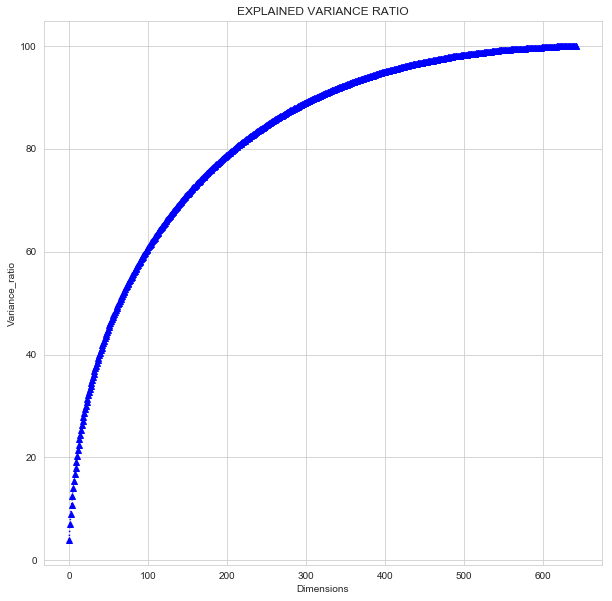

In [42]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(10,10))

plt.plot(var,color='blue', marker='^', linestyle = ':')
plt.xlabel('Dimensions', fontsize=10)
plt.ylabel('Variance_ratio', fontsize=10)
plt.title('EXPLAINED VARIANCE RATIO');

## Variance Explained by each Variable

In [43]:
variance1 = pd.DataFrame(X.columns)
variance1['variance1 Ratio'] = pd.Series(var)

variance1['variance1 Ratio'] = pd.Series(var)

# Renaming "single Column"
variance1 = variance1.rename(columns = {0:'Variables'})

# sorting values by 'Coefficient Estimate'
variance1 = variance1.sort_values(by=['variance1 Ratio'],ascending=False).reset_index(drop=True)

In [44]:
variance1.head(20)

,Variables,variance1 Ratio
0,justice,100.04
1,sure,100.04
2,help,100.04
3,fund,100.04
4,arm,100.04
5,farm,100.04
6,issue,100.04
7,violence,100.04
8,force,100.04
9,research,100.04


## Running K Means with (256 Components)

In [45]:
from sklearn.cluster import KMeans

In [46]:
# Fitting and normalizing data to PCA with 256 components
# We use .fit_transform so that PCA result can be used in K means clustering.
X_pca = PCA(256).fit_transform(X_norm)

In [47]:
# Running K Means Clustering, use random_state=4 if you do not want clusters to change
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)
X_pca_clustered = kmeans.predict(X_pca)

In [48]:
# Identifying unique values based on number of clusters
# Each label represents which cluster the row of data belongs to.
# Kmeans.labels_ shows labels for clusters
# If you print kmeans.labels_ it will give you labels for all 4000 rows.

print('Kmeans.labels_ , Clusters:', numpy.unique(kmeans.labels_))
print('length of labels:', len(kmeans.labels_))

Kmeans.labels_ , Clusters: [0 1 2 3]
length of labels: 1422


In [49]:
# Value counts for each label
x = kmeans.labels_
y = np.bincount(x)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[  0, 772],
       [  1,  58],
       [  2, 363],
       [  3, 229]], dtype=int64)

In [50]:
# Each list in the array represents a cluster
# Each value in the cluster represents variable or a component column
# Two dimensional array, list with in list represent number of clusters
# Each cluster has 255 centroid values

centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.14277439e-02 -8.32338424e-02 -7.31619089e-02 ... -4.09323267e-05
   7.78905484e-04 -1.53287227e-04]
 [ 7.58321238e-01  3.08252943e-01  2.67948735e-02 ...  5.98906024e-04
   3.68152780e-03  1.91276803e-03]
 [-2.58213754e-02 -5.08599167e-02  1.68601227e-01 ...  9.38676720e-08
  -1.90784478e-03 -8.70107517e-04]
 [-1.89658039e-01  2.83144128e-01 -2.74032942e-02 ... -1.38465815e-05
  -5.34043626e-04  1.41155556e-03]]


In [51]:
# rows represent clusters, columns variables
centroids.shape

(4, 256)

In [52]:
# Clusters, Columns(Variables, Components) first three only
centroids[:,0:3]

array([[ 0.01142774, -0.08323384, -0.07316191],
       [ 0.75832124,  0.30825294,  0.02679487],
       [-0.02582138, -0.05085992,  0.16860123],
       [-0.18965804,  0.28314413, -0.02740329]])

In [53]:
# Centroid values belonging to the first column '0' index
print(centroids[:,0])

# Centroid values belonging to the second column
print(centroids[:,1])

[ 0.01142774  0.75832124 -0.02582138 -0.18965804]
[-0.08323384  0.30825294 -0.05085992  0.28314413]


In [54]:
# Cluster centroid for first two clusters and corrosponding values for the first three columns.
centroids[:2, 0:3]

array([[ 0.01142774, -0.08323384, -0.07316191],
       [ 0.75832124,  0.30825294,  0.02679487]])

In [55]:
# Here 0 is the cluster number
print('length of Centroid[0]:', len(centroids[0]))
# print('Centroid Values for 256 components for cluster[0]:\n', centroids[0])

length of Centroid[0]: 256


### K means Visualization

In [56]:
X_pca.shape

(1422, 256)

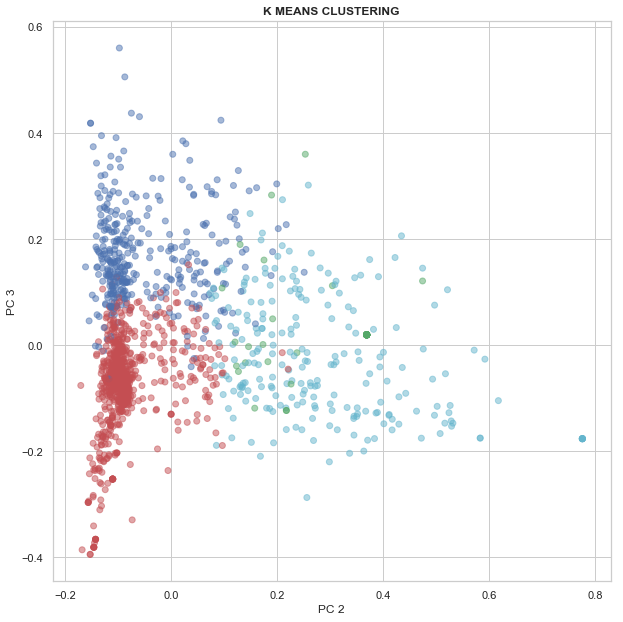

In [60]:
# Define color map
sns.set(style="whitegrid")

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3:'c', 4:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_pca_clustered]

fig, ax = plt.subplots(figsize=(10, 20))

# cluster indices for the first and third PCA projections
plt.scatter(X_pca[:,1], X_pca[:,2], c= label_color, alpha=0.5) 

plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title("K MEANS CLUSTERING", fontweight='bold')
# plt.legend(loc=2)
ax.set_aspect('equal')

plt.show()

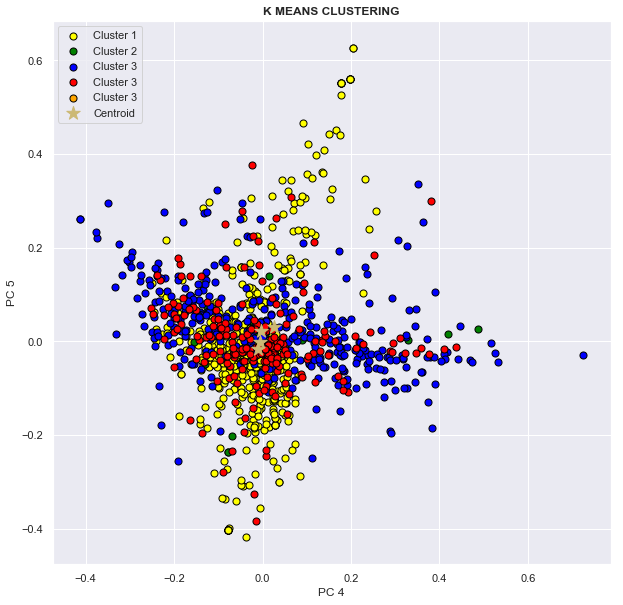

In [61]:
sns.set(style="darkgrid")
Clusters = kmeans.labels_

fig = plt.figure(figsize=(10, 10))

# Clusters for PCA 4 and PCA 5

plt.scatter(X_pca[Clusters == 0, 3], X_pca[Clusters == 0, 4], c='yellow', label='Cluster 1', s=50, edgecolor='black')
plt.scatter(X_pca[Clusters == 1, 3], X_pca[Clusters == 1, 4], c='green', label='Cluster 2', s=50, edgecolor='black')
plt.scatter(X_pca[Clusters == 2, 3], X_pca[Clusters == 2, 4], c='blue', label='Cluster 3', s=50, edgecolor='black')
plt.scatter(X_pca[Clusters == 3, 3], X_pca[Clusters == 3, 4], c='red', label='Cluster 3', s=50, edgecolor='black')
plt.scatter(X_pca[Clusters == 4, 3], X_pca[Clusters == 4, 4], c='orange', label='Cluster 3', s=50, edgecolor='black')


plt.scatter(centroids[:, 3], centroids[:, 4], c='y', s=200, marker='*', label = 'Centroid')

plt.xlabel('PC 4')
plt.ylabel('PC 5')
plt.title("K MEANS CLUSTERING", fontweight='bold')
plt.legend(loc=2)
ax.set_aspect('equal')


plt.show()

### Optimal number of Clusters using K Means Elbow Method

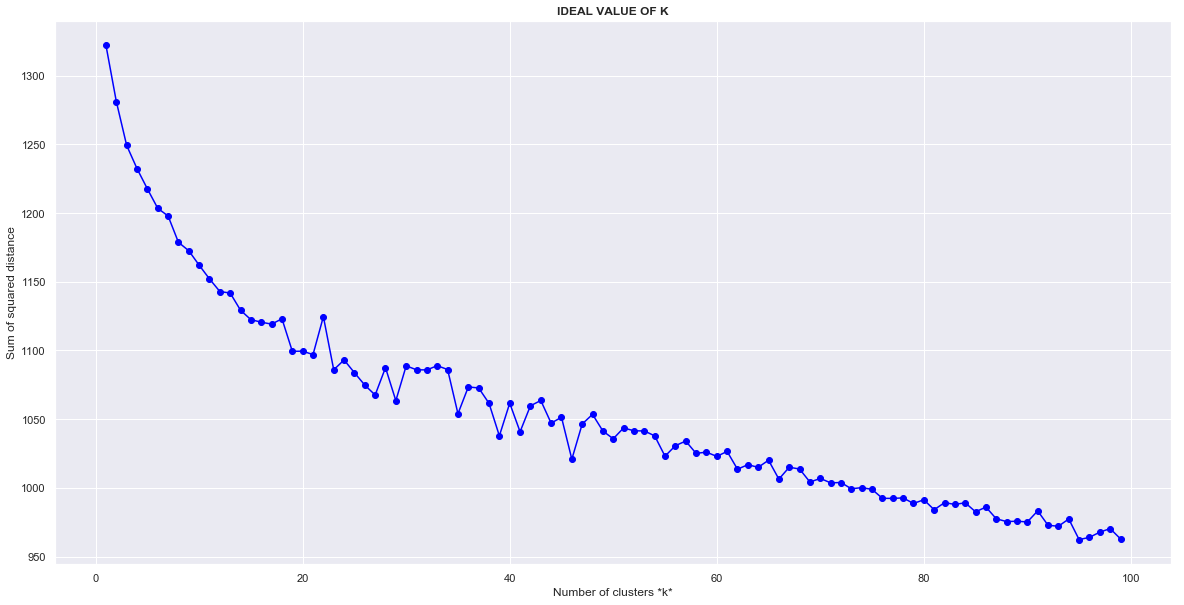

In [121]:
# Run the Kmeans algorithm and get the index of data points clusters
sns.set(style="darkgrid")

sse = []
list_k = list(range(1, 100))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_norm)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(20, 10))
plt.plot(list_k, sse, '-o', color='blue')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title("IDEAL VALUE OF K", fontweight='bold');

### Dividing data (X_pca) in to four samples and checking consistency

In [64]:
# Creating a dataframe to store features and predicted cluster memberships.
ypred = pd.DataFrame()

In [65]:
from sklearn.model_selection import train_test_split

# Splitting data in to halves for both X and X_pca
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_norm[2:1422], X_pca[2:1422], test_size=0.5, random_state=42)

In [66]:
X1, X2, X_pca1, X_pca2 = train_test_split(X_half1, X_pcahalf1, test_size = 0.5, random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(X_half2, X_pcahalf2, test_size = 0.5, random_state=42)

In [67]:
from sklearn.cluster import KMeans
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.

some_list = [(X1, X_pca1), 
             (X2, X_pca2), 
             (X3, X_pca3),
             (X4, X_pca4)]

for counter, data in enumerate(some_list):
    
    # Put the features into ypred.
    ypred['pca_1' + '_sample_' + str(counter)] = data[1][:, 0]
    ypred['pca_2' + '_sample_' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    

In [68]:
X_pca1.shape

(355, 256)

In [69]:
ypred.head()

,pca_1_sample_0,pca_2_sample_0,clust2_sample0,clust3_sample0,clust4_sample0,pca_1_sample_1,pca_2_sample_1,clust2_sample1,clust3_sample1,clust4_sample1,pca_1_sample_2,pca_2_sample_2,clust2_sample2,clust3_sample2,clust4_sample2,pca_1_sample_3,pca_2_sample_3,clust2_sample3,clust3_sample3,clust4_sample3
0,-0.151949,0.107635,1,0,1,-0.039040,-0.107082,0,0,1,-0.201965,0.160852,0,0,0,0.891793,0.368528,1,1,1
1,-0.009403,-0.140051,0,2,0,-0.020317,-0.094481,0,0,1,0.031381,-0.083726,0,2,2,-0.006737,-0.142732,0,0,3
2,-0.015945,0.222514,1,0,2,-0.356317,0.571309,0,2,2,0.030422,-0.094750,0,2,2,0.029200,-0.089765,0,0,2
3,0.103018,-0.035122,0,0,1,-0.014558,-0.106410,0,0,1,0.019111,-0.112798,0,2,2,-0.017397,-0.100845,0,0,2
4,-0.031961,-0.142278,0,2,0,-0.006243,-0.079057,0,0,1,0.225603,0.009221,0,2,2,-0.423506,0.775381,0,2,0


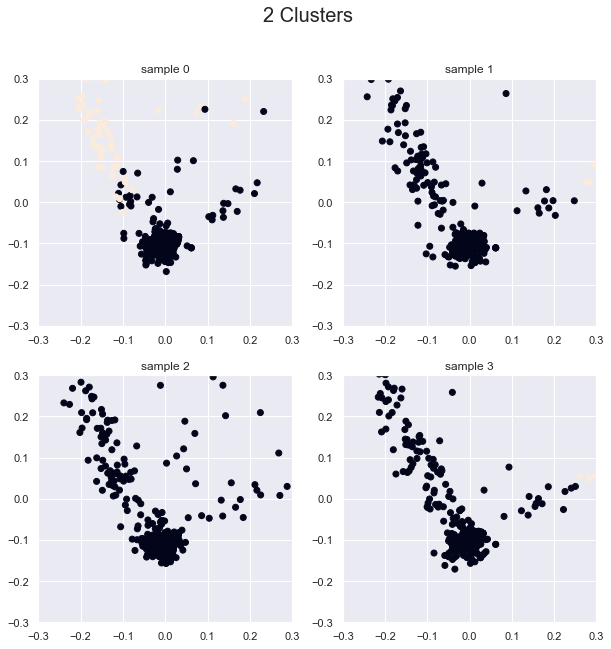

<Figure size 1440x1440 with 0 Axes>

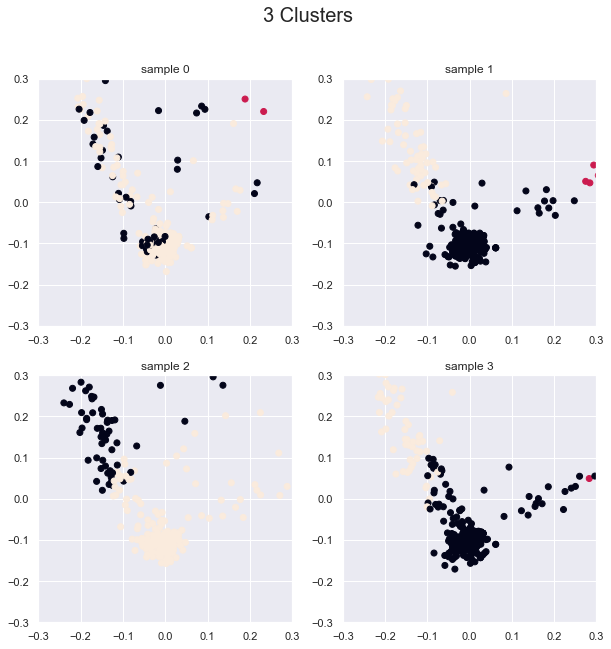

<Figure size 1440x1440 with 0 Axes>

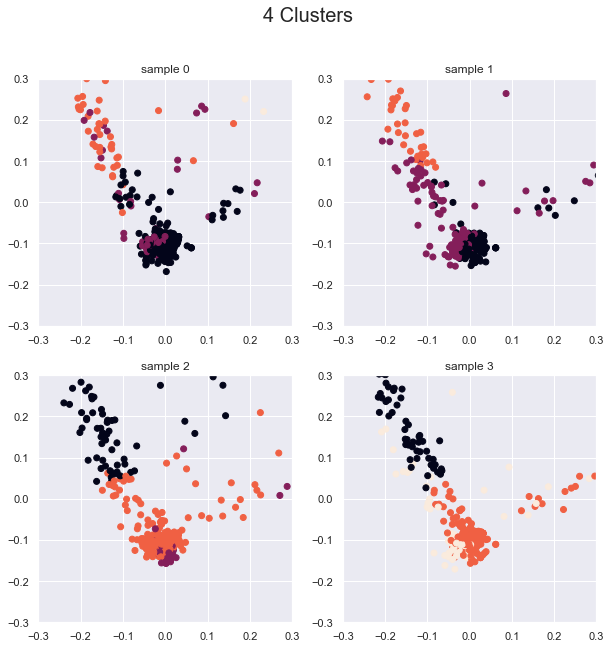

<Figure size 1440x1440 with 0 Axes>

In [70]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.

for cluster in range(2, 5):

 
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2,figsize=[10, 10])
    
        
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_1_sample_{}'.format(i)]
        y_sub = ypred['pca_2_sample_{}'.format(i)]
        
        #LABEL_COLOR_MAP = {0 : 'c',1 : 'g',2 : 'black', 3:'b', 4:'red'}
        #label_color = [LABEL_COLOR_MAP[l] for l in X_pca_clustered]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.figure(figsize=(20, 20))
    plt.tight_layout()
    plt.show()
    print('\n')

### Clusters by each Party

In [81]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

In [82]:
pd.crosstab(y, full_pred)

col_0,0,1,2,3
text_source,,,,
Democratic,206,124,32,394
Republican,187,82,26,371


### Silhouette Score

In [83]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.021309873099294337
0.026349222383078696
0.08726486130736952
0.06122526655306789


In [84]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.027266366919995774
0.04578077113272485
0.0542132760590408
0.03686930938303173


In [85]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
    model = KMeans(n_clusters=5, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.04275732061608979
0.055997850922525544
0.055682921852073436
0.04426370494371544


## Applying Tf-idf to Speeches

In [103]:
#pre-processing
import re 
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", " ", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string) 
    stfing = re.sub("[\(.*?[\)]", "", string)
    return string.strip().lower()

In [104]:
Democratic = clean_str(Democratic_raw)

In [105]:
# Split in to sentences
from nltk import sent_tokenize
Democratic_tk = sent_tokenize(Democratic)

In [106]:
Democratic_tk[0:5]

['president jimmy carters address to a joint session of congress on the state of the union two years ago today we had the first caucus in iowa, and one year ago tomorrow, i walked from here to the white house to take up the duties of president of the united states.',
 'i didnt know it then when i walked, but ive been trying to save energy ever since.i return tonight to fulfill one of those duties of the constitution: to give to the congress, and to the nation, information on the state of the union.militarily, politically, economically, and in spirit, the state of our union is sound.we are a great country, a strong country, a vital and dynamic country, and so we will remain.we are a confident people and a hardworking people, a decent and a compassionate people, and so we will remain.i want to speak to you tonight about where we are and where we must go, about what we have done and what we must do.',
 'and i want to pledge to you my best efforts and ask you to pledge yours.each generatio

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [107]:
# Fitting the model
Democratic_tfidf = vectorizer.fit_transform(Democratic_tk)
print("Number of features: %d" % Democratic_tfidf.get_shape()[1])

Number of features: 2014


In [108]:
print(vectorizer.get_feature_names()[0:10])

['aaron', 'ability', 'able', 'abraham', 'abroad', 'absolute', 'abuse', 'abusive', 'accelerate', 'accept']


In [139]:
# vectorizer.vocabulary_

In [114]:
print(Democratic_tfidf[0:10])

  (0, 1321)	0.33249700480321837
  (0, 952)	0.25020585391782413
  (0, 223)	0.24025711849126313
  (0, 27)	0.19454763427340285
  (0, 958)	0.22623516345287187
  (0, 1609)	0.23254027977674638
  (0, 325)	0.13935361483712003
  (0, 1694)	0.17829378252296732
  (0, 1897)	0.179765595973491
  (0, 2006)	0.12321679330415979
  (0, 48)	0.3537641202646502
  (0, 1826)	0.1642718274845761
  (0, 932)	0.23254027977674638
  (0, 2005)	0.12380795977243932
  (0, 1831)	0.25020585391782413
  (0, 1937)	0.23254027977674638
  (0, 1969)	0.19949640435339233
  (0, 854)	0.19021919286656144
  (0, 514)	0.24025711849126313
  (0, 1899)	0.1694429931622753
  (0, 1695)	0.1633243053020723
  (1, 325)	0.09985077096305642
  (1, 1694)	0.25550498512214587
  (1, 1897)	0.25761417630344907
  (1, 1937)	0.16662162831450256
  :	:
  (9, 128)	0.1283715029818261
  (9, 637)	0.12681622448029725
  (9, 1871)	0.1338079220533633
  (9, 1978)	0.16309713482373178
  (9, 1712)	0.12270622309123298
  (9, 1821)	0.09712082780086659
  (9, 1071)	0.1192312664

In [116]:
# Changing the Sparse Matrix to Dataframe
tfidf = pd.DataFrame(Democratic_tfidf.todense(), columns=vectorizer.vocabulary_)

In [117]:
# Making change to view tfidf values in a descending order
arr = tfidf.values
arr.sort(axis=0)
arr = arr[::-1]

In [118]:
tfidf = pd.DataFrame(arr, index=tfidf.index, columns=tfidf.columns)

In [120]:
tfidf.head()

,president,jimmy,carters,address,joint,session,congress,state,union,years,...,handful,fighters,coalition,prison,muster,willingness,voices,soldier,unarmed,unconditional
0,0.514672,0.304676,0.423004,0.411775,0.657811,0.323191,0.353947,0.300518,0.284780,0.340290,...,0.840714,1.000000,0.431136,0.638494,0.391711,0.373616,0.407849,0.837079,0.673208,0.281404
1,0.376991,0.226702,0.404981,0.384674,0.646624,0.304676,0.263218,0.215167,0.251062,0.305829,...,0.390471,0.579268,0.367637,0.293201,0.384528,0.340787,0.398843,0.584291,0.430998,0.230279
2,0.000000,0.000000,0.373208,0.000000,0.401453,0.000000,0.149157,0.000000,0.182491,0.292778,...,0.336390,0.458071,0.355394,0.279826,0.000000,0.317844,0.378458,0.478194,0.371355,0.000000
3,0.000000,0.000000,0.338141,0.000000,0.382775,0.000000,0.000000,0.000000,0.000000,0.159092,...,0.310197,0.414434,0.323553,0.279206,0.000000,0.254715,0.359528,0.469373,0.000000,0.000000
4,0.000000,0.000000,0.337649,0.000000,0.296626,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.303372,0.406199,0.313761,0.000000,0.000000,0.208804,0.328751,0.314433,0.000000,0.000000


In [122]:
from nltk.probability import FreqDist
tfidf1 = FreqDist(Democratic_tk)
print(tfidf1)

<FreqDist with 1453 samples and 1530 outcomes>


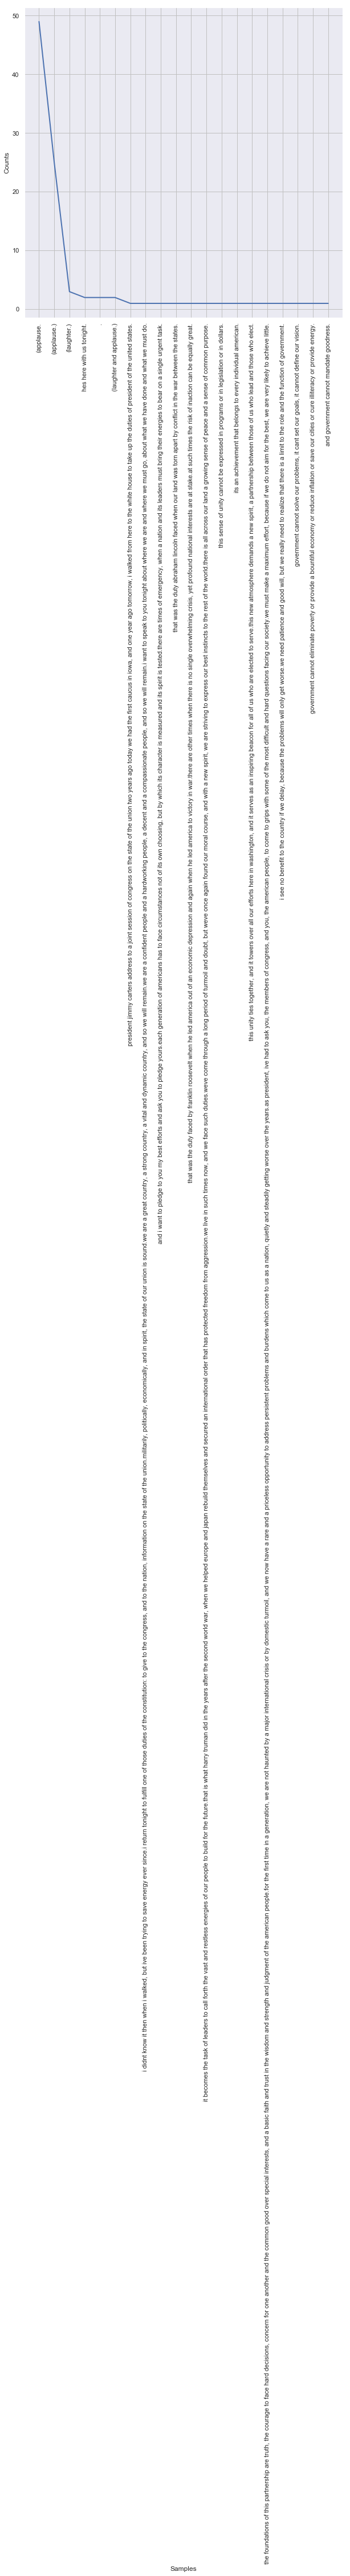

In [127]:
# Frequency Distribution Plot
plt.figure(figsize=(10,10))
tfidf1.plot(20,cumulative=False)
plt.show()

## Word Tokenization - Democratic

In [138]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(Democratic)
# print(tokenized_word)

In [89]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 4225 samples and 37450 outcomes>


In [90]:
fdist.most_common(2)

[('the', 1824), ('to', 1412)]

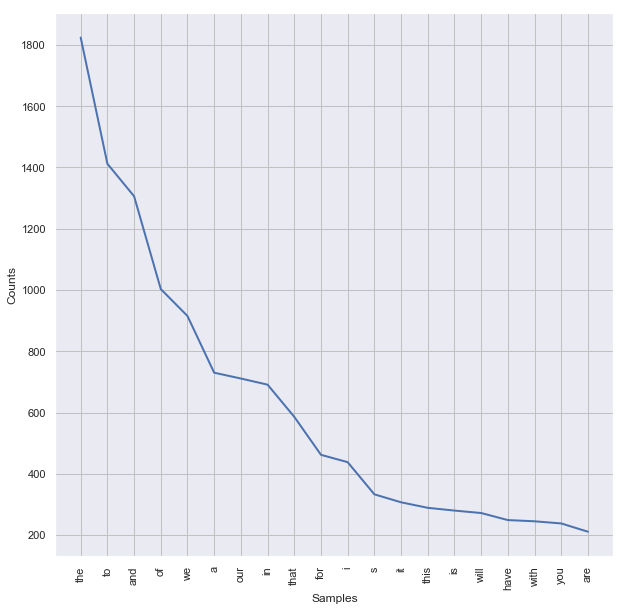

In [128]:
# Frequency Distribution Plot
plt.figure(figsize=(10,10))
fdist.plot(20,cumulative=False)
plt.show()